# 4. Calculting wastewater quality

The core functionality of pySIMDEUM is to deliver consumption, and if required, discharge water profiles for houses. However, some optional post-processing analysis is offered for the user to calculate wastewater quality. This includes:

* Nutrient concentrations
    * 
* Discharge temperature

## Multi-day simulations

In [1]:
import pysimdeum
import matplotlib.pyplot as plt

Initialise a two-person household. By default, a 1-day event is simulated. You can control the number of days by inputting a `str` into the `duration` argument.

In [60]:
# Build a house (two-person household)
house = pysimdeum.built_house(house_type='family', duration ='1 day')

/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:287: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.iloc[start:end] = intensity
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6723566666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  discharge_pattern.loc[discharge_start:discharge_end - pd.Timedelta(seconds=1)] = discharge_rate # restrict range to not be inclusive of final timstamp as this would result in extra discharge
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

Some enduses such as the `WashingMachine` and `Dishwasher` are more likely to be used overnight so are more likely to experience cut off when passing the end of the simulation time. The plot below shows such a case for a `WashingMachine` that has three usage events, once at ~8-9am, 1-3pm and another starting around 11pm, but the final two cycles of that usage event are cut off by the end of the simulation time.

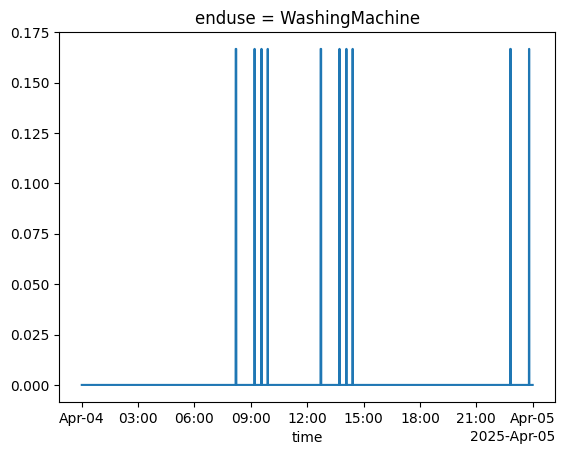

In [62]:
house.consumption.sum(["user","patterns","flowtypes"]).sel(enduse="WashingMachine").plot()

Notice that in the case below, when resimulating over a 2 day period, we still have an event being cutoff at the end of the simulation time. However, in the middle of the simulation we have an event crossing over midnight of the first day into the start of the second day. pySIMDEUM handles this by default and just allows it to run into the second day.

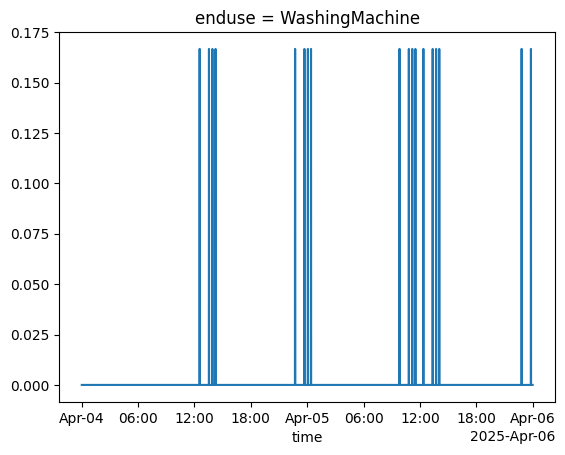

In [79]:
consumption, discharge = house.simulate(num_patterns=1, duration='2 day', simulate_discharge=True)
consumption.sum(["user","patterns","flowtypes"]).sel(enduse="WashingMachine").plot()

## Spillover feature

The `spillover` feature specifically targets events that run past the end time of a simulation period. When toggled on `spillover=True`, the remainder of the affected `consumption` and/or `discharge` event (passing midnight on the final day of simulation) will be wrapped back into the start of the simulation period (Day 1 00:00:00).

In the plot below, you can see the consumption event of the `WashingMachine` extending past the end of the simulation time and then having its final cycle looped back into the start of the simulation. The behaviour is also implemented for the `discharge` event. Note how the event passing midnight at the end of the first day is unaffected.

A usage event for  Dishwasher  use has spilled over to the next day. Adjusting spillover times...
Spillover consumption adjustment complete.
A usage event for  WashingMachine  use has spilled over to the next day. Adjusting spillover times...
Spillover consumption adjustment complete.


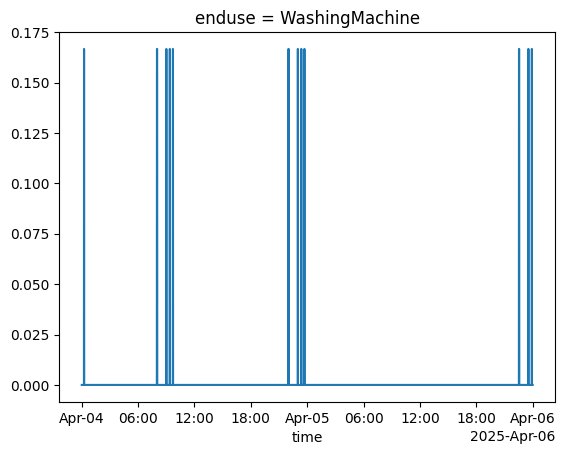

In [90]:
consumption, discharge = house.simulate(num_patterns=1, duration='2 day', simulate_discharge=True, spillover=True)
consumption.sum(["user","patterns","flowtypes"]).sel(enduse="WashingMachine").plot()

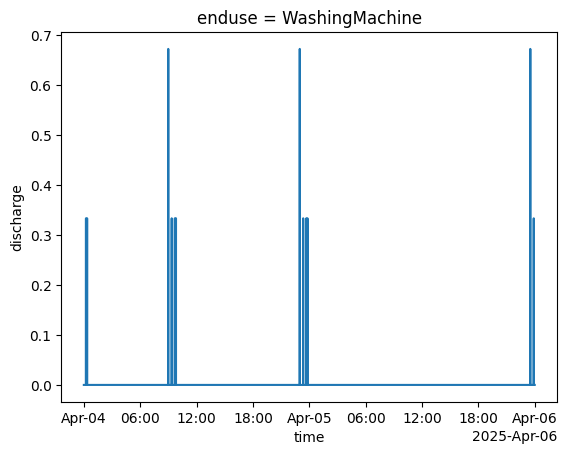

In [95]:
discharge.discharge.sum(["user","patterns","dischargetypes"]).sel(enduse="WashingMachine").plot()